# Ensemble Classifiers: Expanded Featureset
---

### Pre-Training Setup

In [1]:
import sys
sys.path.append('../') # Make parent folder visible
import numpy as np
from scipy.stats import randint

from sklearn import svm, linear_model, neighbors, ensemble, naive_bayes, \
    neural_network, tree, gaussian_process, discriminant_analysis
    
import matplotlib.pyplot as plt

from preprocess import load_data
from model_helpers.models import compute_confusion, explain_confusion, \
    test_model, plot_cv_roc_curves, ScikitModel

In [2]:
x, y, ids = load_data.load_expanded(one_hot=False, fill_mode='mean')

### Test out Candidate Learners

In [3]:
svm_rocs = test_model(ScikitModel(svm.SVC(probability=True), 
                       {
                           'C': np.logspace(-3, 3, 100),
                           'gamma': np.logspace(-3, 3, 100),
                           'kernel': ['linear', 'rbf', 'poly']
                       },
                       random_search=True,
                       n_iter=100,
                       scoring='roc_auc',
                       verbose=True),
                      x, y,
                      threshold=0.40)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.7min finished


Best params:  {'kernel': 'rbf', 'gamma': 0.002009233002565048, 'C': 2.8480358684358018}
Best score:  0.983466327771
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 22.5min finished


Best params:  {'kernel': 'rbf', 'gamma': 0.0023101297000831605, 'C': 15.199110829529332}
Best score:  0.977971785679
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.9min finished


Best params:  {'kernel': 'linear', 'gamma': 23.101297000831579, 'C': 0.0053366992312063122}
Best score:  0.982303721727
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 14.0min finished


Best params:  {'kernel': 'rbf', 'gamma': 0.001, 'C': 17.475284000076829}
Best score:  0.978540004675
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best params:  {'kernel': 'rbf', 'gamma': 0.0026560877829466868, 'C': 6.5793322465756825}
Best score:  0.981447554647
CV Confusion:  [[115, 10, 10, 154], [115, 10, 6, 158], [109, 15, 10, 154], [115, 9, 3, 161], [105, 19, 5, 159]]
Best CV scores:  [ 0.9835  0.978   0.9823  0.9785  0.9814]
Avg best scores:  0.9807458789
FC Classified as FC: 111.8, (89.8713826367 %)
FC Classified as KD: 12.6, (10.1286173633 %)
KD Classified as FC: 6.8, (4.14634146341 %)
KD Classified as KD: 157.2, (95.8536585366 %)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.0min finished


In [4]:
lr_rocs = test_model(ScikitModel(linear_model.LogisticRegression(), 
                       params={
                           'C': np.logspace(-2, 2, 5)
                       },
                       random_search=False,
                       scoring='roc_auc',
                       verbose=True),
           x, y,
           threshold=0.4)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


Best params:  {'C': 0.01}
Best score:  0.983330902425
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.01}
Best score:  0.97744783695
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


Best params:  {'C': 1.0}
Best score:  0.982086419115
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.10000000000000001}
Best score:  0.978113205694
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.10000000000000001}
Best score:  0.981677474335
CV Confusion:  [[112, 13, 6, 158], [114, 11, 3, 161], [111, 13, 7, 157], [115, 9, 4, 160], [105, 19, 6, 158]]
Best CV scores:  [ 0.9833  0.9774  0.9821  0.9781  0.9817]
Avg best scores:  0.980531167703
FC Classified as FC: 111.4, (89.5498392283 %)
FC Classified as KD: 13.0, (10.4501607717 %)
KD Classified as FC: 5.2, (3.17073170732 %)
KD Classified as KD: 158.8, (96.8292682927 %)


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


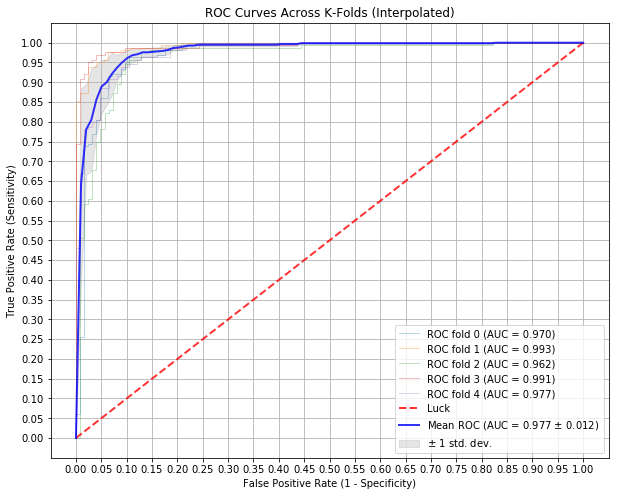

In [5]:
plot_cv_roc_curves(lr_rocs)

In [6]:
rf_rocs = test_model(ScikitModel(ensemble.RandomForestClassifier(), 
                       params={
                           'n_estimators': randint(10, 250),
                           'max_features': randint(3, 15),
                           'min_samples_split': randint(2, 25),
                           'min_samples_leaf': randint(1, 25)
                       },
                       random_search=True,
                       n_iter=100,
                       scoring='roc_auc',
                       verbose=True),
           x, y,
           threshold=0.4)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.6min finished


Best params:  {'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 217}
Best score:  0.982487264815
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.7min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 151}
Best score:  0.978301902388
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.6min finished


Best params:  {'max_features': 4, 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 160}
Best score:  0.981526111526
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.7min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 211}
Best score:  0.979028971633
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.4min finished


Best params:  {'max_features': 4, 'min_samples_leaf': 11, 'min_samples_split': 4, 'n_estimators': 215}
Best score:  0.982545124603
CV Confusion:  [[111, 14, 5, 159], [109, 16, 2, 162], [107, 17, 6, 158], [108, 16, 4, 160], [94, 30, 3, 161]]
Best CV scores:  [ 0.9825  0.9783  0.9815  0.979   0.9825]
Avg best scores:  0.980777874993
FC Classified as FC: 105.8, (85.0482315113 %)
FC Classified as KD: 18.6, (14.9517684887 %)
KD Classified as FC: 4.0, (2.43902439024 %)
KD Classified as KD: 160.0, (97.5609756098 %)


## Sklearn Ensemble Model

In [7]:
# Grid search params
clf1 = svm.SVC(probability=True)
clf2 = linear_model.LogisticRegression()

eclf = ensemble.VotingClassifier(
    estimators=[('svm', clf1), ('lr', clf2)],
    voting='soft')

params = {
    'svm__C': np.logspace(-3, 2, 100),
    'svm__gamma': np.logspace(-3, 2, 100),
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'lr__C': np.logspace(-3, 2, 100)
}

# Test model! 5-fold CV with hyperparameter optimization
clf = ScikitModel(
    eclf,
    params,
    random_search=True, 
    n_iter=100, 
    verbose=True)

ensemble_rocs = test_model(clf, x, y, threshold=0.4)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.3min finished


Best params:  {'svm__kernel': 'linear', 'svm__gamma': 0.47508101621027982, 'svm__C': 0.0040370172585965534, 'lr__C': 0.01830738280295368}
Best score:  0.983589916899
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.4min finished


Best params:  {'svm__kernel': 'linear', 'svm__gamma': 0.11768119524349979, 'svm__C': 0.84975343590864383, 'lr__C': 0.0045348785081285817}
Best score:  0.978583734634
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.4min finished


Best params:  {'svm__kernel': 'linear', 'svm__gamma': 0.023101297000831592, 'svm__C': 0.0022570197196339192, 'lr__C': 3.4304692863149193}
Best score:  0.983099063852
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.2min finished


Best params:  {'svm__kernel': 'linear', 'svm__gamma': 0.0011233240329780276, 'svm__C': 0.065793322465756796, 'lr__C': 0.046415888336127795}
Best score:  0.978357966798
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best params:  {'svm__kernel': 'rbf', 'svm__gamma': 0.0022570197196339192, 'svm__C': 0.42292428743894989, 'lr__C': 0.11768119524349979}
Best score:  0.982120616781
CV Confusion:  [[114, 11, 8, 156], [112, 13, 4, 160], [110, 14, 8, 156], [115, 9, 4, 160], [104, 20, 6, 158]]
Best CV scores:  [ 0.9836  0.9786  0.9831  0.9784  0.9821]
Avg best scores:  0.981150259793
FC Classified as FC: 111.0, (89.2282958199 %)
FC Classified as KD: 13.4, (10.7717041801 %)
KD Classified as FC: 6.0, (3.65853658537 %)
KD Classified as KD: 158.0, (96.3414634146 %)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.9min finished


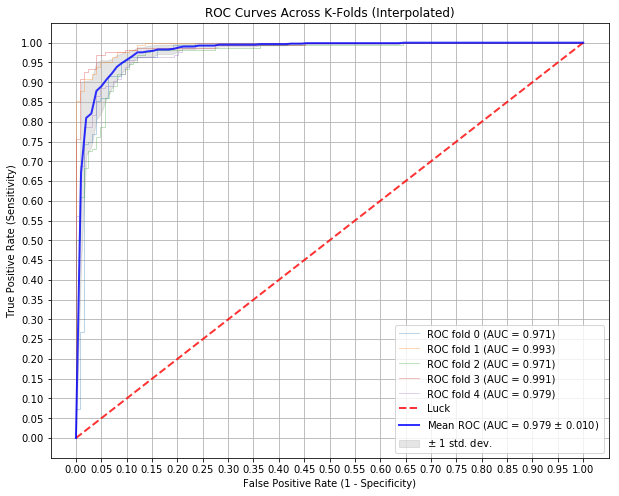

In [8]:
plot_cv_roc_curves(ensemble_rocs)